In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('JustTaxi.csv',  index_col= 0 ) 
print('The number of null values in features dataframe are:')
print(df.isnull().sum(axis = 0))
print('The info of the columns in features dataframe are:')
print(df.info())
df.head()

The number of null values in features dataframe are:
bookingID         0
Accuracy          0
Bearing           0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
second            0
Speed             0
label             0
dtype: int64
The info of the columns in features dataframe are:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7194164 entries, 0 to 7194163
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   bookingID       float64
 1   Accuracy        float64
 2   Bearing         float64
 3   acceleration_x  float64
 4   acceleration_y  float64
 5   acceleration_z  float64
 6   gyro_x          float64
 7   gyro_y          float64
 8   gyro_z          float64
 9   second          float64
 10  Speed           float64
 11  label           int64  
dtypes: float64(11), int64(1)
memory usage: 713.5 MB
None


,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
0,2.748779e+11,9.293,17.000000,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000,1
1,1.632088e+11,10.000,262.184418,0.599490,-9.180023,-2.520432,0.026767,-0.030687,-0.006071,556.0,2.110000,0
2,1.632088e+11,3.900,247.000000,-0.178970,9.149704,3.551163,-0.006271,-0.026047,-0.012314,32.0,9.050000,1
3,2.920578e+11,4.000,248.000000,0.270553,3.270579,8.959376,-0.009404,0.023554,-0.006946,1008.0,9.497410,1
4,2.491081e+11,6.000,95.000000,-0.152798,9.903376,-0.042253,-0.006894,0.063513,0.028047,518.0,0.048665,1


In [3]:
df.describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
count,7.194164e+06,7.194164e+06,7.194164e+06,7.194164e+06,7.194164e+06,7.194164e+06,7.194164e+06,7.194164e+06,7.194164e+06,7.194164e+06,7.194164e+06,7.194164e+06
mean,8.182724e+11,1.010795e+01,1.652125e+02,6.777408e-02,4.457620e+00,8.896588e-01,-1.738069e-03,-1.271499e-04,-3.658102e-04,6.008619e+02,9.022868e+00,3.041180e-01
std,4.951463e+11,6.255569e+01,1.089644e+02,1.350015e+00,8.068016e+00,3.173510e+00,1.000226e-01,1.781302e-01,1.026586e-01,4.615592e+02,8.104775e+00,4.600329e-01
min,0.000000e+00,7.500000e-01,0.000000e+00,-9.999999e+00,-1.999507e+01,-1.499623e+01,-9.998474e-01,-5.989435e+00,-6.938964e+00,0.000000e+00,-1.547627e+01,0.000000e+00
25%,3.779571e+11,3.900000e+00,7.300000e+01,-5.051765e-01,-1.925577e+00,-9.233101e-01,-2.654852e-02,-2.970117e-02,-1.846768e-02,2.410000e+02,1.042856e+00,0.000000e+00
50%,8.074539e+11,4.162000e+00,1.640000e+02,6.190796e-02,9.088211e+00,7.781393e-01,-6.548475e-04,2.593994e-04,-2.443045e-05,5.190000e+02,7.560000e+00,0.000000e+00
75%,1.254130e+12,8.000000e+00,2.603179e+02,6.320692e-01,9.709717e+00,2.745844e+00,2.307129e-02,3.108388e-02,1.810910e-02,8.610000e+02,1.549360e+01,1.000000e+00
max,1.709397e+12,1.500000e+03,3.599995e+02,1.339649e+01,2.493920e+01,1.499944e+01,1.311228e+00,5.996460e+00,6.690163e+00,8.234000e+03,9.244882e+01,1.000000e+00


# Graphs

## Violin Plot for Gyro for Safe and Dangerous trip

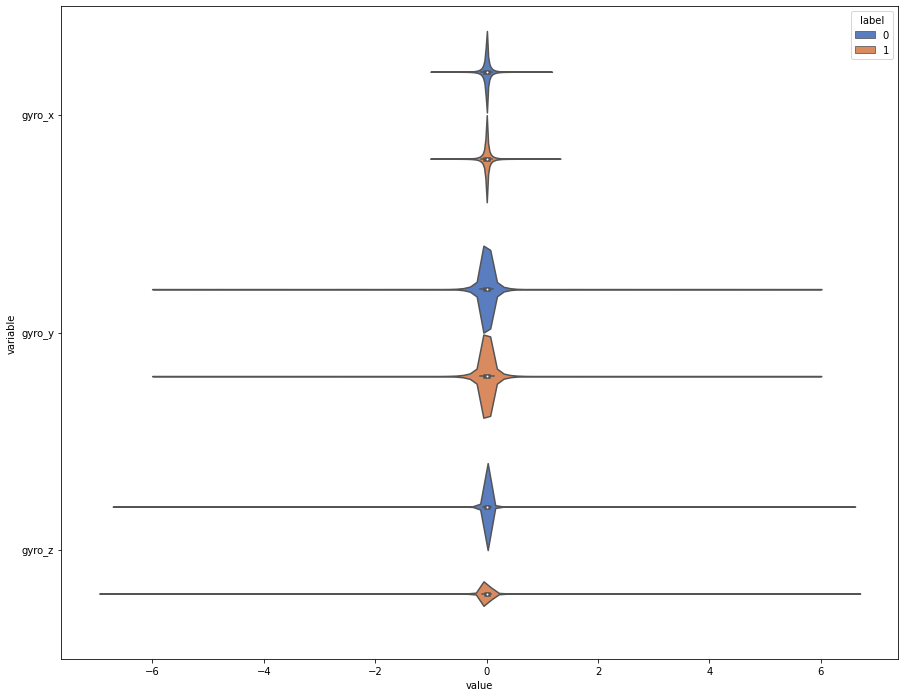

In [34]:
cc=df[['gyro_x','gyro_y','gyro_z','label']]
cc=pd.melt(cc, id_vars=['label'], value_vars=['gyro_x','gyro_y','gyro_z'])
fig, ax = plt.subplots(figsize=(15,12))
sns.violinplot(x="value", y="variable", hue="label",
                    data=cc, palette="muted")
plt.show()


This is a violin plot showing the distribution of the gyro for safe and dangerous labels. The overall shape and distribution of each group of gyros are similar for both types of trips. The median, which is around 0 radian, is similar for all gyros. The interquartile range for the 2 labels is very small and similar for both types of trips. The interquartile range is small because the values for gyro are in radian, not degree. Radians are in smaller values meaning a radian of 1 is equivalent to 57.2958 degrees. Comparing the length of the line for each violin plot, we can see that the range for each gyro and type of trip is similar. The only difference that we can see is the line of dangerous trip for gyro_z is slightly longer than the line of the safe trip. This would mean that there are larger range of values for dangerous trip in gyro_z than the safe trips. The distribution of the safe trips and dangerous trip for gyro_x are similar. There are many records that have values of gyro_x around 0 radian. For gyro_y, there are many values that also around 0 but as compared to gyro_x, the values are more distributed. For gyro_z, the shape of the distribution for both types of trips are pointed at the sides. This means that very high percentage of the records are close to 0.

## Correlation for safe data

In [28]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff

# safe10 is all the safe data
safe10 = df[df['label']==0]
safe10 = safe10[safe10['Accuracy']<=3]
df1=safe10.drop(['label','bookingID'], axis=1)
corr = df1.corr().round(5)
mask = np.triu(np.ones_like(corr, dtype=bool))
df_mask = corr.mask(mask)

fig = ff.create_annotated_heatmap(z=df_mask.to_numpy(), 
                                  x=df_mask.columns.tolist(),
                                  y=df_mask.columns.tolist(),
                                  colorscale=px.colors.diverging.Tealrose,
                                  hoverinfo="none", #Shows hoverinfo for null values
                                  showscale=True, ygap=1, xgap=1
                                 )

fig.update_xaxes(side="bottom")

fig.update_layout(
    title_text='Correlation for Safe Trips', 
    title_x=0.5, 
    title_font_size=22,
    width=1000, 
    height=1000,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
    yaxis_autorange='reversed',
    template='plotly_white'
)

# NaN values are not handled automatically and are displayed in the figure
# So we need to get rid of the text manually
for i in range(len(fig.layout.annotations)):
    if fig.layout.annotations[i].text == 'nan':
        fig.layout.annotations[i].text = ""

fig.show()

According to Our Kloud, most GPS tracking devices are accurate to within three meters. Hence, two heatmaps were done to visualize the correlation between all the variables for records with accuracy within 3.
This chart shows the correlation for safe trips. Overall, the correlation between the variables is quite low. However, among all the correlation values, speed and acceleration y seem to be the most correlated with a value of 0.121. While correlation between second and gyro z seems to be the lowest with a value of 0.00036 which is very close to 0. There are some variables which are negatively correlated. Speed and acceleration x has the highest negative correlation of -0.567.

## Correlation for Dangerous data

In [29]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff

# unsafe data is all dangerous data
unsafe10 = df[df['label']==1]
unsafe10 = unsafe10[unsafe10['Accuracy']<=3]
df2=unsafe10.drop(['label','bookingID'], axis=1)
corr = df2.corr().round(5)
mask = np.triu(np.ones_like(corr, dtype=bool))
df_mask = corr.mask(mask)

fig = ff.create_annotated_heatmap(z=df_mask.to_numpy(), 
                                  x=df_mask.columns.tolist(),
                                  y=df_mask.columns.tolist(),
                                  colorscale=px.colors.diverging.Tealrose,
                                  hoverinfo="none", #Shows hoverinfo for null values
                                  showscale=True, ygap=1, xgap=1
                                 )

fig.update_xaxes(side="bottom")

fig.update_layout(
    title_text='Correlation for Unsafe Trips', 
    title_x=0.5,
    title_font_size=22,
    width=1000, 
    height=1000,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
    yaxis_autorange='reversed',
    template='plotly_white'
)

# NaN values are not handled automatically and are displayed in the figure
# So we need to get rid of the text manually
for i in range(len(fig.layout.annotations)):
    if fig.layout.annotations[i].text == 'nan':
        fig.layout.annotations[i].text = ""

fig.show()

This chart shows the correlation for dangerous trips. Like the chart for safe trips, the correlation between variable here is also quite low generally. Among all the correlation values, correlation between speed and second is the highest with a value of 0.129. While correlation between acceleration y and acceleration x is the lowest with correlation value of 0.00012. Among the variables which are negatively correlated, speed and acceleration y has the highest negative correlation value of -0.301. 

All in all, there are no variables that seem to be showing a significant correlational relationship.

## Line chart for speed, acceleration.
This line chart is plotted with 1 bookingID. The bookingID is chose because it contains the highest mean speed out of all bookingIDs.

In [31]:
import pandas as pd
import plotly.express as px
grouped_df = df.groupby("bookingID")

mean_df = grouped_df.mean()
mean_df = mean_df.reset_index()
maxspeed = max(mean_df['Speed'])
bookingid = mean_df[mean_df['Speed']==maxspeed]['bookingID'] # making a datfarame with bookingID = x
bookingidx = df[df['bookingID']==int(bookingid)] # making a datfarame with bookingID = x
bookingidx = bookingidx.sort_values(by=['second'])
fig = px.line(bookingidx, x='second', y = ['Speed' , 'acceleration_x', 'acceleration_y', 'acceleration_z'])
fig.show()

This is a line chart that shows the changes in speed, acceleration_x, acceleration_y and acceleration_z against time. This is only plotted with one bookingID which is derived from finding the median out of all the average speed for all bookingIDs. This line chart shows that there is not much changes in acceleration when the speed is changing. For example, at around 100 seconds of the trip, there is a huge drop in the speed and acceleration in all axis decreased slightly. But in overall, the changes in speed did not have a huge impact in the changes in the acceleration. Acceleration_y has the biggest range out of all the acceleration. The acceleration in all axes do not change greatly according to each other. For example, at around 200 seconds, there is a decrease in the acceleration_y and acceleration_x also decreased.

## Violin plot for speed dangerous and safe trips

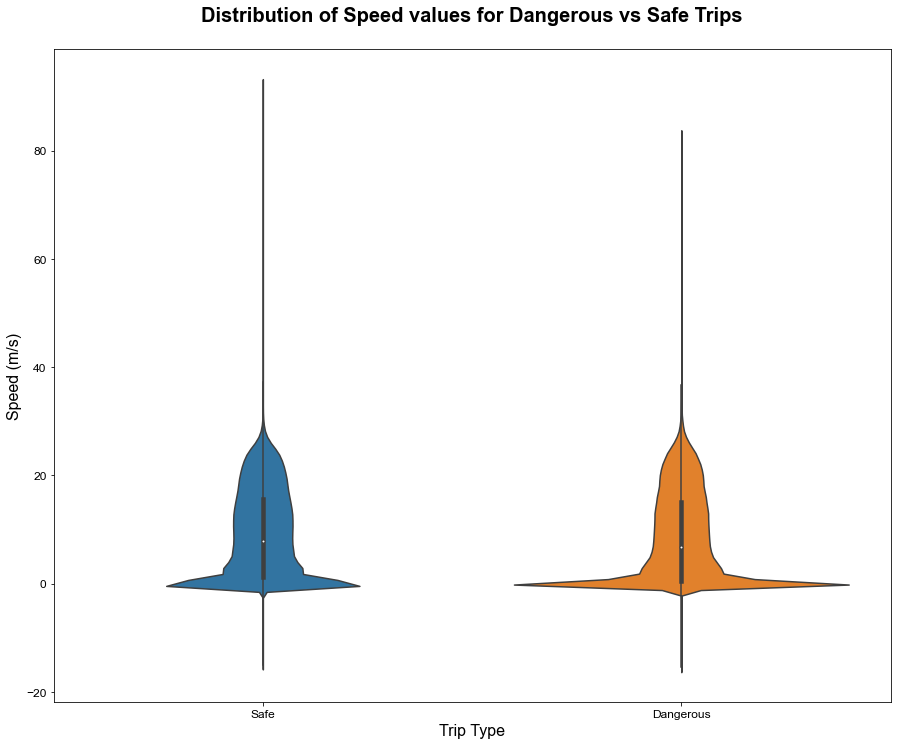

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
#result is dataset with labels col merged
ax=sns.violinplot(data=df, y='Speed', x='label')
plt.title('Distribution of Speed values for Dangerous vs Safe Trips\n', fontsize=20, fontweight='bold', fontname='Arial')
plt.xlabel('Trip Type', fontsize=16, fontname='Arial')
plt.ylabel('Speed (m/s)', fontsize=16, fontname='Arial')
ax.set_xticklabels(['Safe','Dangerous'])
plt.xticks(fontsize=12,fontname='Arial')
plt.yticks(fontsize=12,fontname='Arial')
plt.show()

This is a violin plot of speed for safe and dangerous trips.
This plot is done to visualize the distribution of speed for the different trip types. The interquartile range of speed for dangerous trips is around -18 to 51 m/s, which is bigger than the interquartile range of speed for safe trips which is around -18 to 42 m/s. The reason could be because dangerous trips might have taxis going in extreme speeds. As much as its dangerous to drive at extremely high speed it is as equally dangerous to drive too slowly. Hence, the median speed for safe trips which is around 19m/s seem to be slightly higher than that for dangerous trips which is around 18m/s. 


## Pie chart

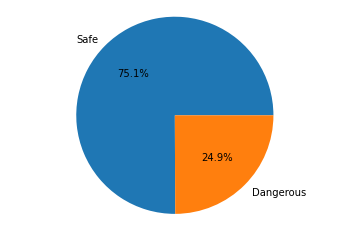

In [4]:
sizes = labelsdf['label'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  autopct='%1.1f%%', labels = ['Safe' , 'Dangerous'])
plt.show()

The pie chart shows that ¾ of the trips are safe and ¼ of it are dangerous. This suggests that there is a 24.9% chance of a trip being dangerous and 25% probability is a very high chance for a Taxi company. The company should decrease their chances of a dangerous trip to maximum 5% so that the passengers feel safer in the taxis.

## Histogram of duration of trips for all bookingID

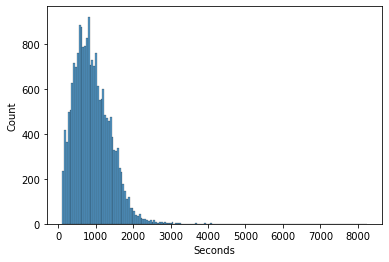

In [33]:
bookingids = df['bookingID'].unique() # get all the bookingids that have null values inside them
duration = []
for bookingid in bookingids: #loop for each bookingid so that we are dealing with the null values bookingid by bookingid which is easier to work with
    bookingidx = df[df['bookingID']==bookingid] # making a datfarame with bookingID = x
    column = bookingidx["second"]
    max_value = column.max()
    duration.append(max_value)
ax = sns.histplot(duration)
ax.set(xlabel='Seconds', ylabel='Count')
plt.show()

The histogram shows the distribution of the duration of trips made in this dataset. As you can see, the histogram is skewed to the right. Most of the trips last for around 1000 seconds. There are fewer longer trips that last up to 8000 seconds. 